In [1]:
import os
os.chdir(r"C:\Users\gorre\OneDrive\Desktop\dai_assignment") 


In [2]:
import pandas as pd
df = pd.read_csv("data_set.csv")

In [3]:
df.head()

,Customer_ID,Age,Gender,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Payment_Method,Time_of_Purchase
0,1,22.0,Female,Gardening & Outdoors,333.80,4.0,Mixed,5.0,5.0,Credit Card,03-01-2024
1,2,49.0,Male,Food & Beverages,222.22,11.0,In-Store,3.0,1.0,PayPal,4/16/2024
2,3,24.0,Female,NaN,426.22,2.0,NaN,5.0,5.0,Debit Card,3/15/2024
3,4,29.0,Female,Home Appliances,101.31,6.0,Mixed,3.0,1.0,Other,NaN
4,5,33.0,Female,Furniture,211.70,6.0,Mixed,3.0,4.0,NaN,1/30/2024


In [5]:
df.shape

(1050, 11)

In [9]:
print(df.isnull().sum()) 

Customer_ID                0
Age                      105
Gender                   112
Purchase_Category        110
Purchase_Amount          104
Frequency_of_Purchase    103
Purchase_Channel         100
Brand_Loyalty            107
Product_Rating           105
Payment_Method           104
Time_of_Purchase         105
dtype: int64


In [11]:
# Convert numerical columns explicitly
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Fill numerical columns with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with mode
df.fillna(df.mode().iloc[0], inplace=True)


In [13]:
print(df.isnull().sum()) 

Customer_ID              0
Age                      0
Gender                   0
Purchase_Category        0
Purchase_Amount          0
Frequency_of_Purchase    0
Purchase_Channel         0
Brand_Loyalty            0
Product_Rating           0
Payment_Method           0
Time_of_Purchase         0
dtype: int64


In [15]:
print(f"duplicate rows: {df.duplicated().sum()}")

duplicate rows: 47


In [17]:
df.drop_duplicates(inplace=True)
print(f"Remaining duplicate rows: {df.duplicated().sum()}")


Remaining duplicate rows: 0


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            1003 non-null   int64  
 1   Age                    1003 non-null   float64
 2   Gender                 1003 non-null   object 
 3   Purchase_Category      1003 non-null   object 
 4   Purchase_Amount        1003 non-null   float64
 5   Frequency_of_Purchase  1003 non-null   float64
 6   Purchase_Channel       1003 non-null   object 
 7   Brand_Loyalty          1003 non-null   float64
 8   Product_Rating         1003 non-null   float64
 9   Payment_Method         1003 non-null   object 
 10  Time_of_Purchase       1003 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 94.0+ KB
None


In [21]:
import numpy as np

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute IQR only for numeric data
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

print(df.info())  # Check updated data size


<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            1003 non-null   int64  
 1   Age                    1003 non-null   float64
 2   Gender                 1003 non-null   object 
 3   Purchase_Category      1003 non-null   object 
 4   Purchase_Amount        1003 non-null   float64
 5   Frequency_of_Purchase  1003 non-null   float64
 6   Purchase_Channel       1003 non-null   object 
 7   Brand_Loyalty          1003 non-null   float64
 8   Product_Rating         1003 non-null   float64
 9   Payment_Method         1003 non-null   object 
 10  Time_of_Purchase       1003 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 94.0+ KB
None


In [23]:
df.to_csv("cleaned_data_set.csv", index=False)
print("Cleaned dataset saved as 'cleaned_data_set.csv'.")
df.head()


Cleaned dataset saved as 'cleaned_data_set.csv'.


,Customer_ID,Age,Gender,Purchase_Category,Purchase_Amount,Frequency_of_Purchase,Purchase_Channel,Brand_Loyalty,Product_Rating,Payment_Method,Time_of_Purchase
0,1,22.0,Female,Gardening & Outdoors,333.80,4.0,Mixed,5.0,5.0,Credit Card,03-01-2024
1,2,49.0,Male,Food & Beverages,222.22,11.0,In-Store,3.0,1.0,PayPal,4/16/2024
2,3,24.0,Female,Electronics,426.22,2.0,In-Store,5.0,5.0,Debit Card,3/15/2024
3,4,29.0,Female,Home Appliances,101.31,6.0,Mixed,3.0,1.0,Other,03-03-2024
4,5,33.0,Female,Furniture,211.70,6.0,Mixed,3.0,4.0,PayPal,1/30/2024


In [25]:
# Convert non-numeric columns to NaN, then drop them
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Summary statistics for numerical columns
print("Summary Statistics:\n", df_numeric.describe(), "\n" + "-"*50 + "\n")

# Mode (excluding NaNs)
print("Mode:\n", df_numeric.mode().iloc[0], "\n" + "-"*50 + "\n")

# Skewness (excluding NaNs)
print("Skewness:\n", df_numeric.skew(), "\n" + "-"*50 + "\n")


Summary Statistics:
        Customer_ID          Age  Gender  Purchase_Category  Purchase_Amount  \
count  1003.000000  1003.000000     0.0                0.0      1003.000000   
mean    529.860419    35.230309     NaN                NaN       314.091790   
std     309.004329    11.005524     NaN                NaN       394.941142   
min       1.000000    18.000000     NaN                NaN        50.710000   
25%     256.500000    27.000000     NaN                NaN       171.565000   
50%     547.000000    35.000000     NaN                NaN       268.695000   
75%     799.500000    42.000000     NaN                NaN       378.530000   
max    1050.000000   100.000000     NaN                NaN      4737.700000   

       Frequency_of_Purchase  Purchase_Channel  Brand_Loyalty  Product_Rating  \
count            1003.000000               0.0    1003.000000     1003.000000   
mean                6.992024               NaN       2.995015        3.020937   
std                 2.99

In [27]:
# Count unique values for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(f"\nFrequency Distribution for {col}:")
    print(df[col].value_counts())



Frequency Distribution for Gender:
Gender
Female         509
Male           407
Bigender        16
Agender         16
Genderfluid     15
Non-binary      15
Polygender      14
Genderqueer     11
Name: count, dtype: int64

Frequency Distribution for Purchase_Category:
Purchase_Category
Electronics                  158
Sports & Outdoors             49
Jewelry & Accessories         45
Home Appliances               43
Packages)                     43
Software & Apps               41
Animal Feed                   41
Toys & Games                  41
Gardening & Outdoors          40
Groceries                     37
Baby Products                 37
Food & Beverages              37
Health Supplements            37
Mobile Accessories            37
Furniture                     36
Hotels                        36
Books                         33
Health Care                   32
Office Supplies               31
Luxury Goods                  31
Travel & Leisure (Flights     31
Beauty & Personal Car

In [29]:
import sys
print(sys.executable)


C:\Users\gorre\anaconda3\envs\ds_env\python.exe


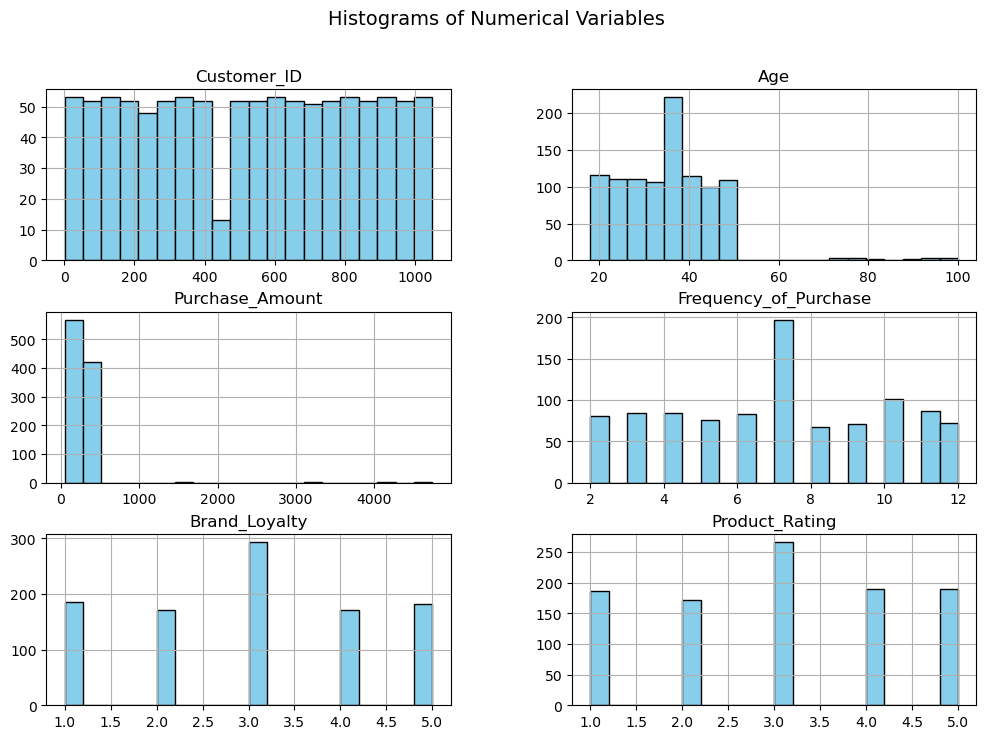

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Variables", fontsize=14)
plt.show()


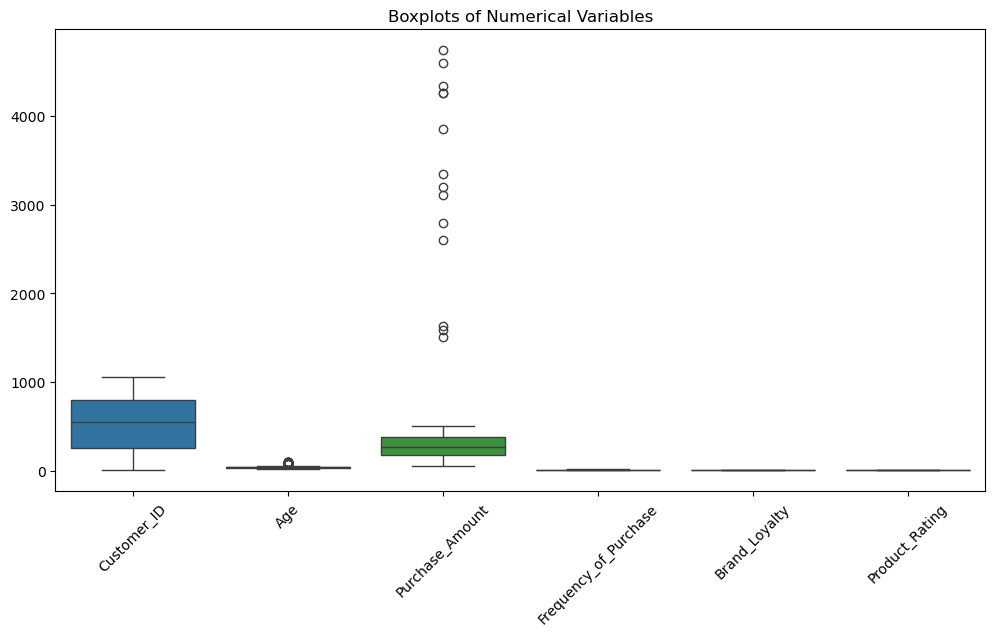

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()


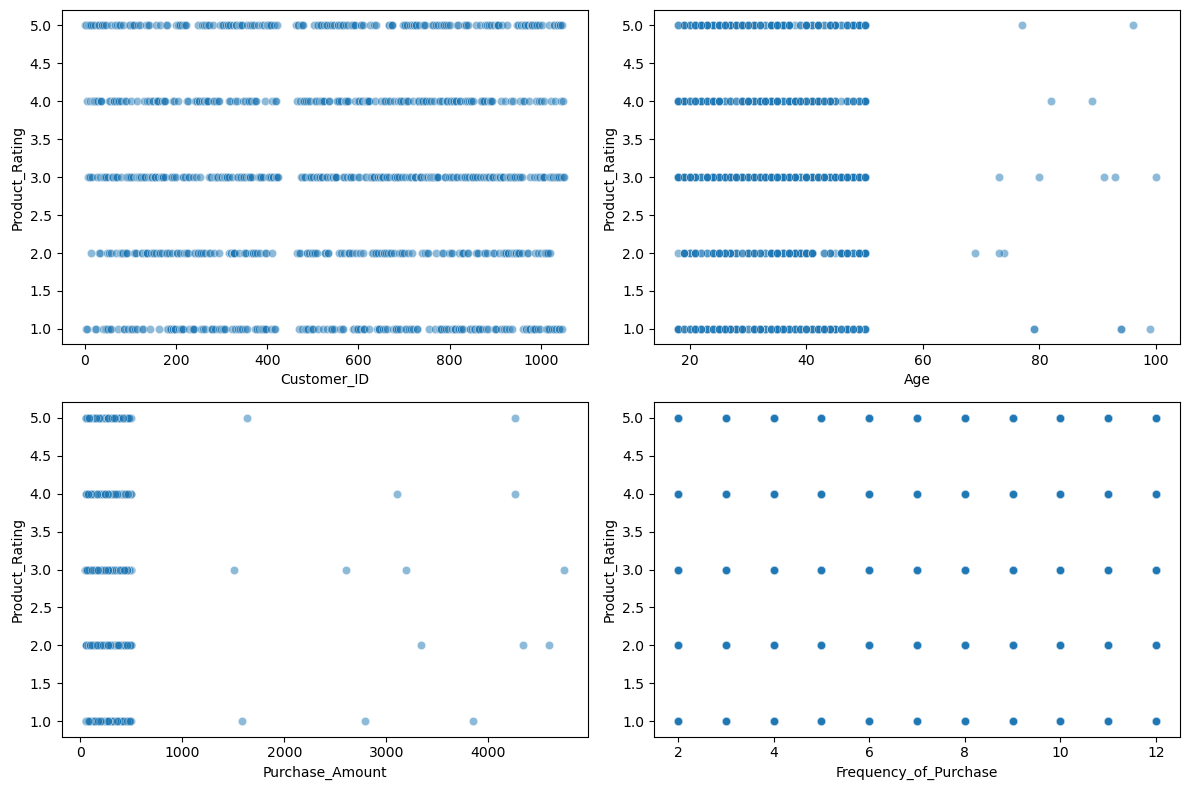

In [33]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols[:4]):  # Limiting to first 4 numerical columns for better visualization
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df[col], y=df[num_cols[-1]], alpha=0.5)  # Assuming last column is the dependent variable
    plt.xlabel(col)
    plt.ylabel(num_cols[-1])

plt.tight_layout()
plt.show()


In [36]:
# Standardize Gender values
df['Gender'] = df['Gender'].str.lower().str.strip()

# Keep only 'male' and 'female'
df = df[df['Gender'].isin(['male', 'female'])]

print(df['Gender'].value_counts())  # Verify the cleaned values


Gender
female    509
male      407
Name: count, dtype: int64


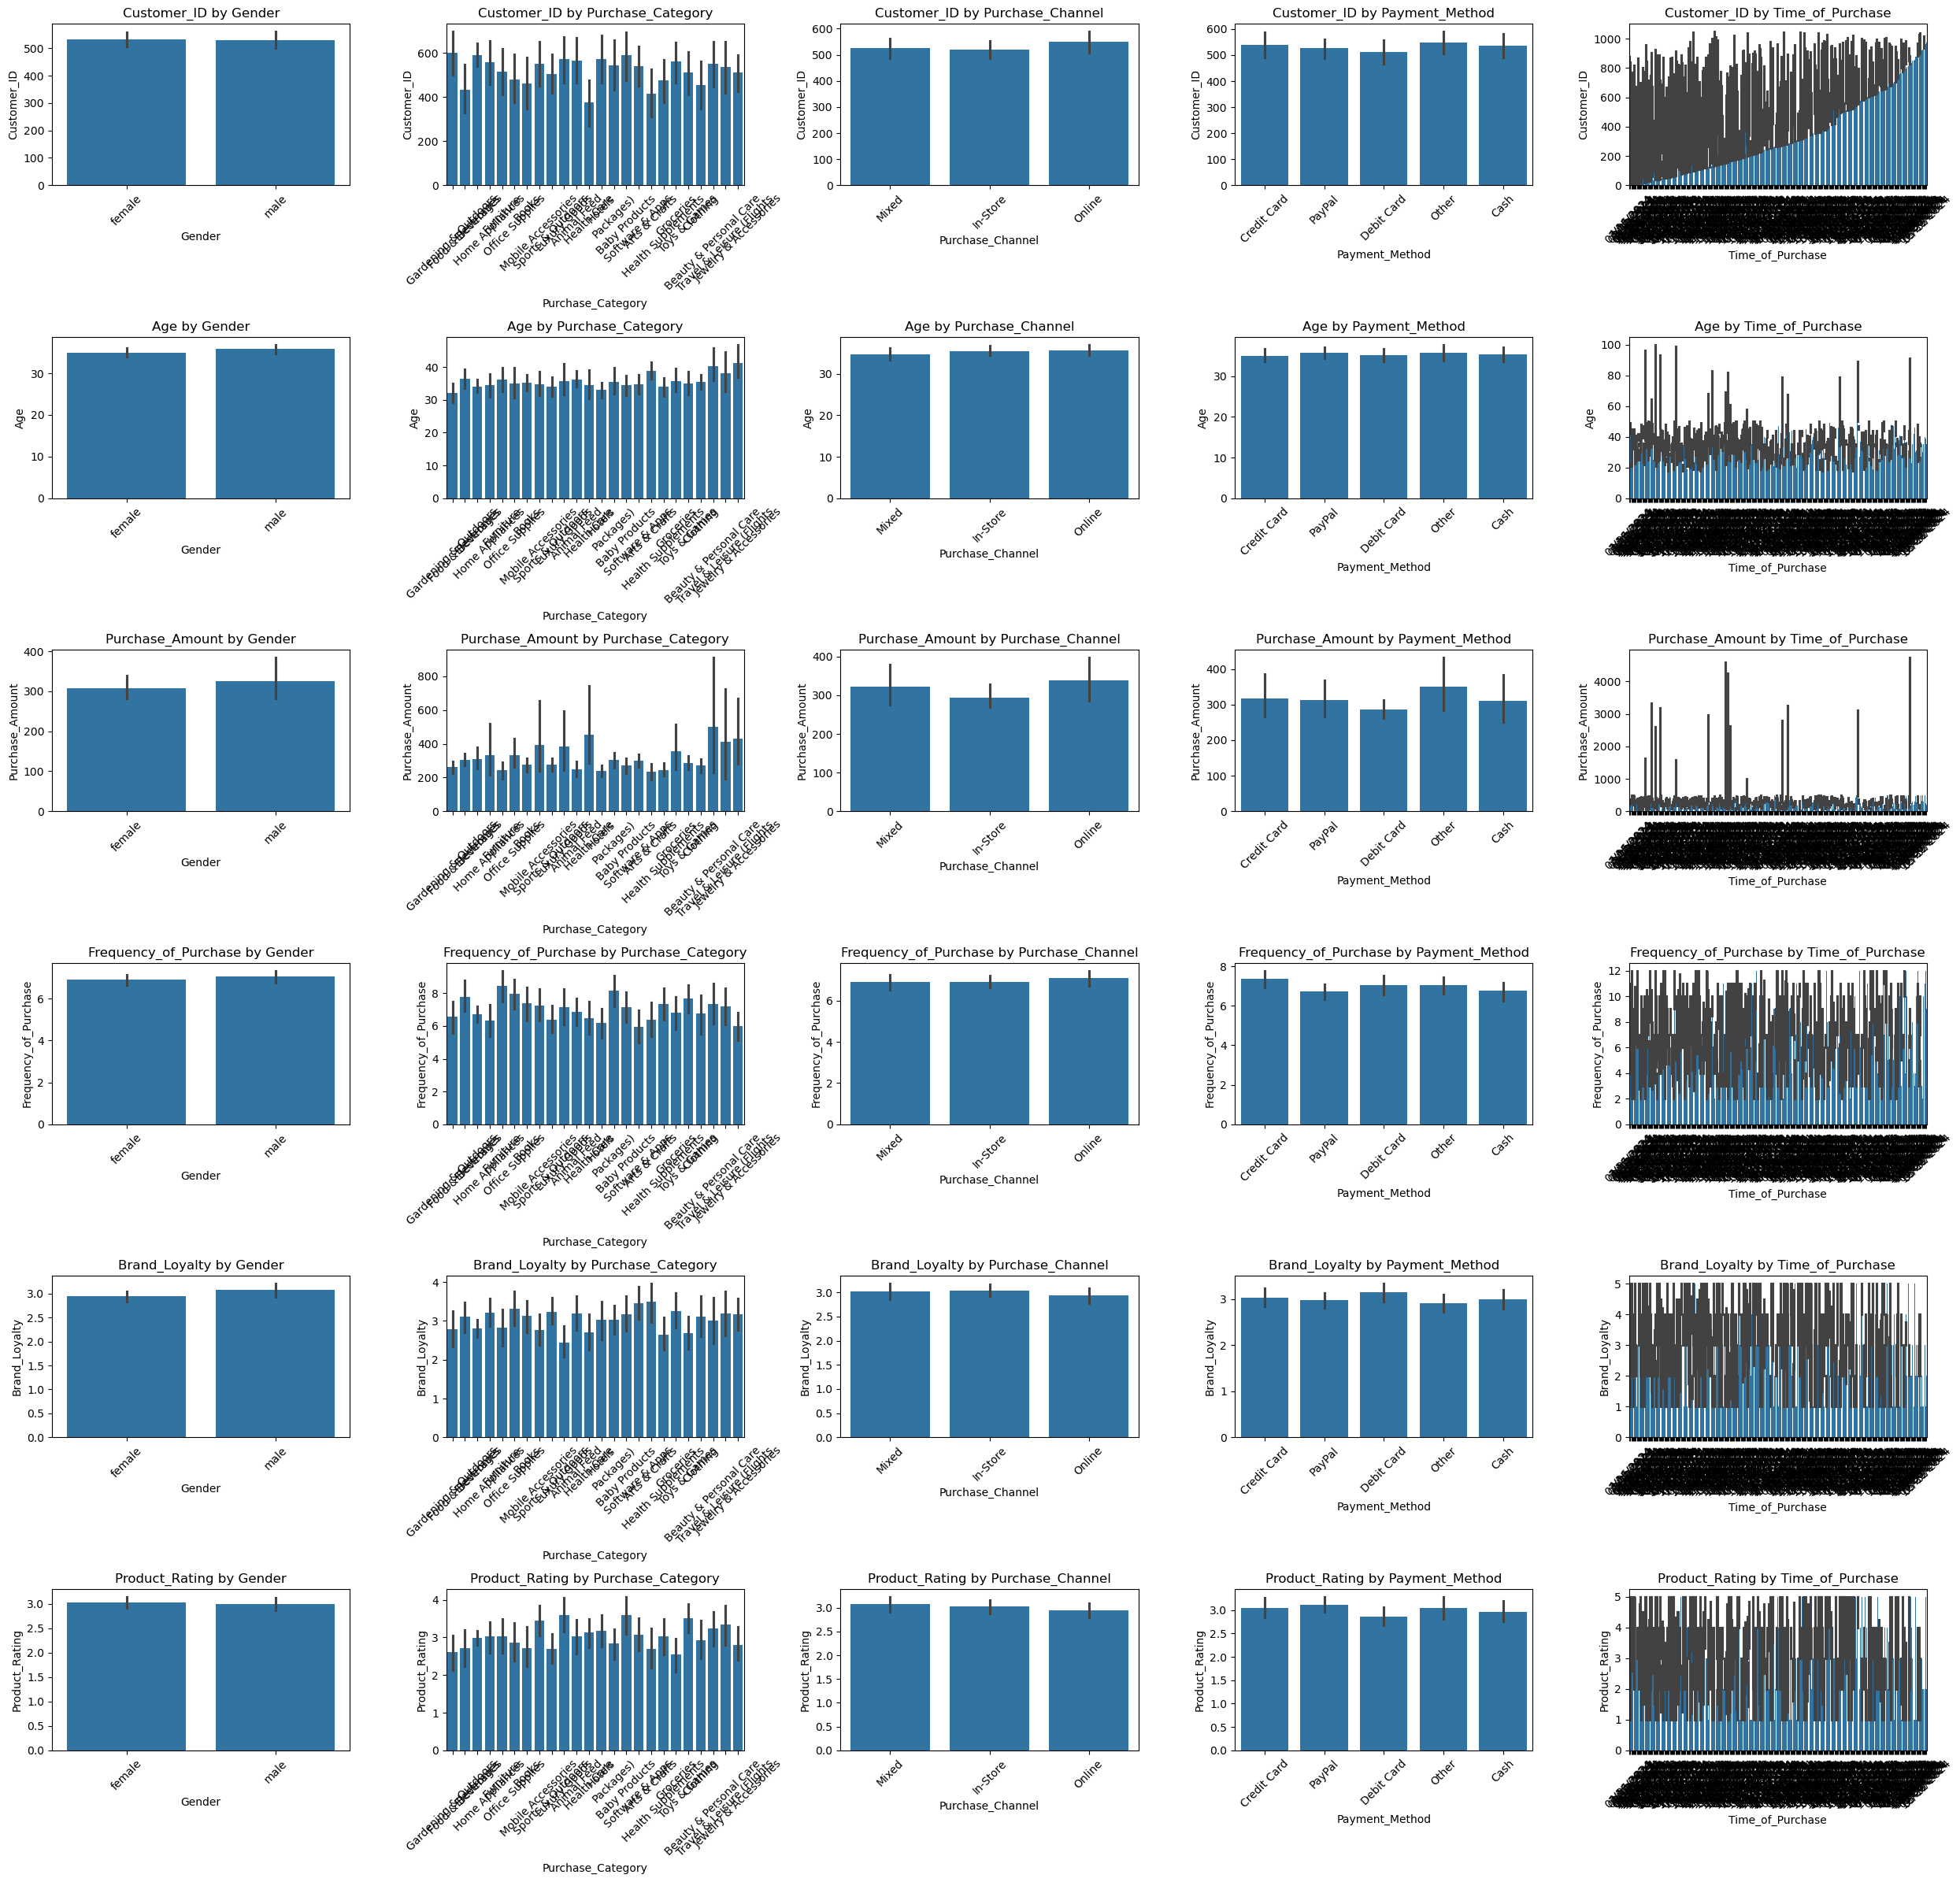

In [39]:
fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(5 * len(cat_cols), 4 * len(num_cols)))
for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        sns.barplot(x=df[cat], y=df[num], ax=axes[i, j])
        axes[i, j].set_title(f"{num} by {cat}")
        axes[i, j].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [41]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()


In [43]:
print("Categorical Columns:", cat_cols)
print("Numerical Columns:", num_cols)


Categorical Columns: ['Gender', 'Purchase_Category', 'Purchase_Channel', 'Payment_Method', 'Time_of_Purchase']
Numerical Columns: ['Customer_ID', 'Age', 'Purchase_Amount', 'Frequency_of_Purchase', 'Brand_Loyalty', 'Product_Rating']


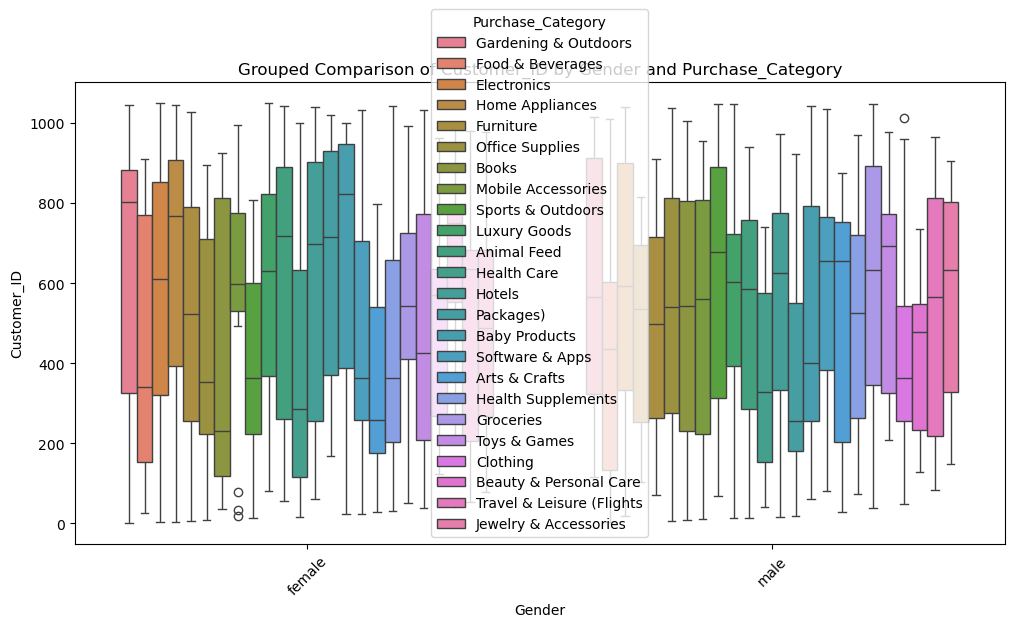

In [45]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['number']).columns.tolist()

if len(cat_cols) < 2:
    print("Not enough categorical columns for hue grouping. At least 2 required.")
elif len(num_cols) < 1:
    print("Not enough numerical columns for Y-axis.")
else:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[cat_cols[0]], y=df[num_cols[0]], hue=df[cat_cols[1]], data=df)
    plt.xticks(rotation=45)
    plt.title(f"Grouped Comparison of {num_cols[0]} by {cat_cols[0]} and {cat_cols[1]}")
    plt.show()

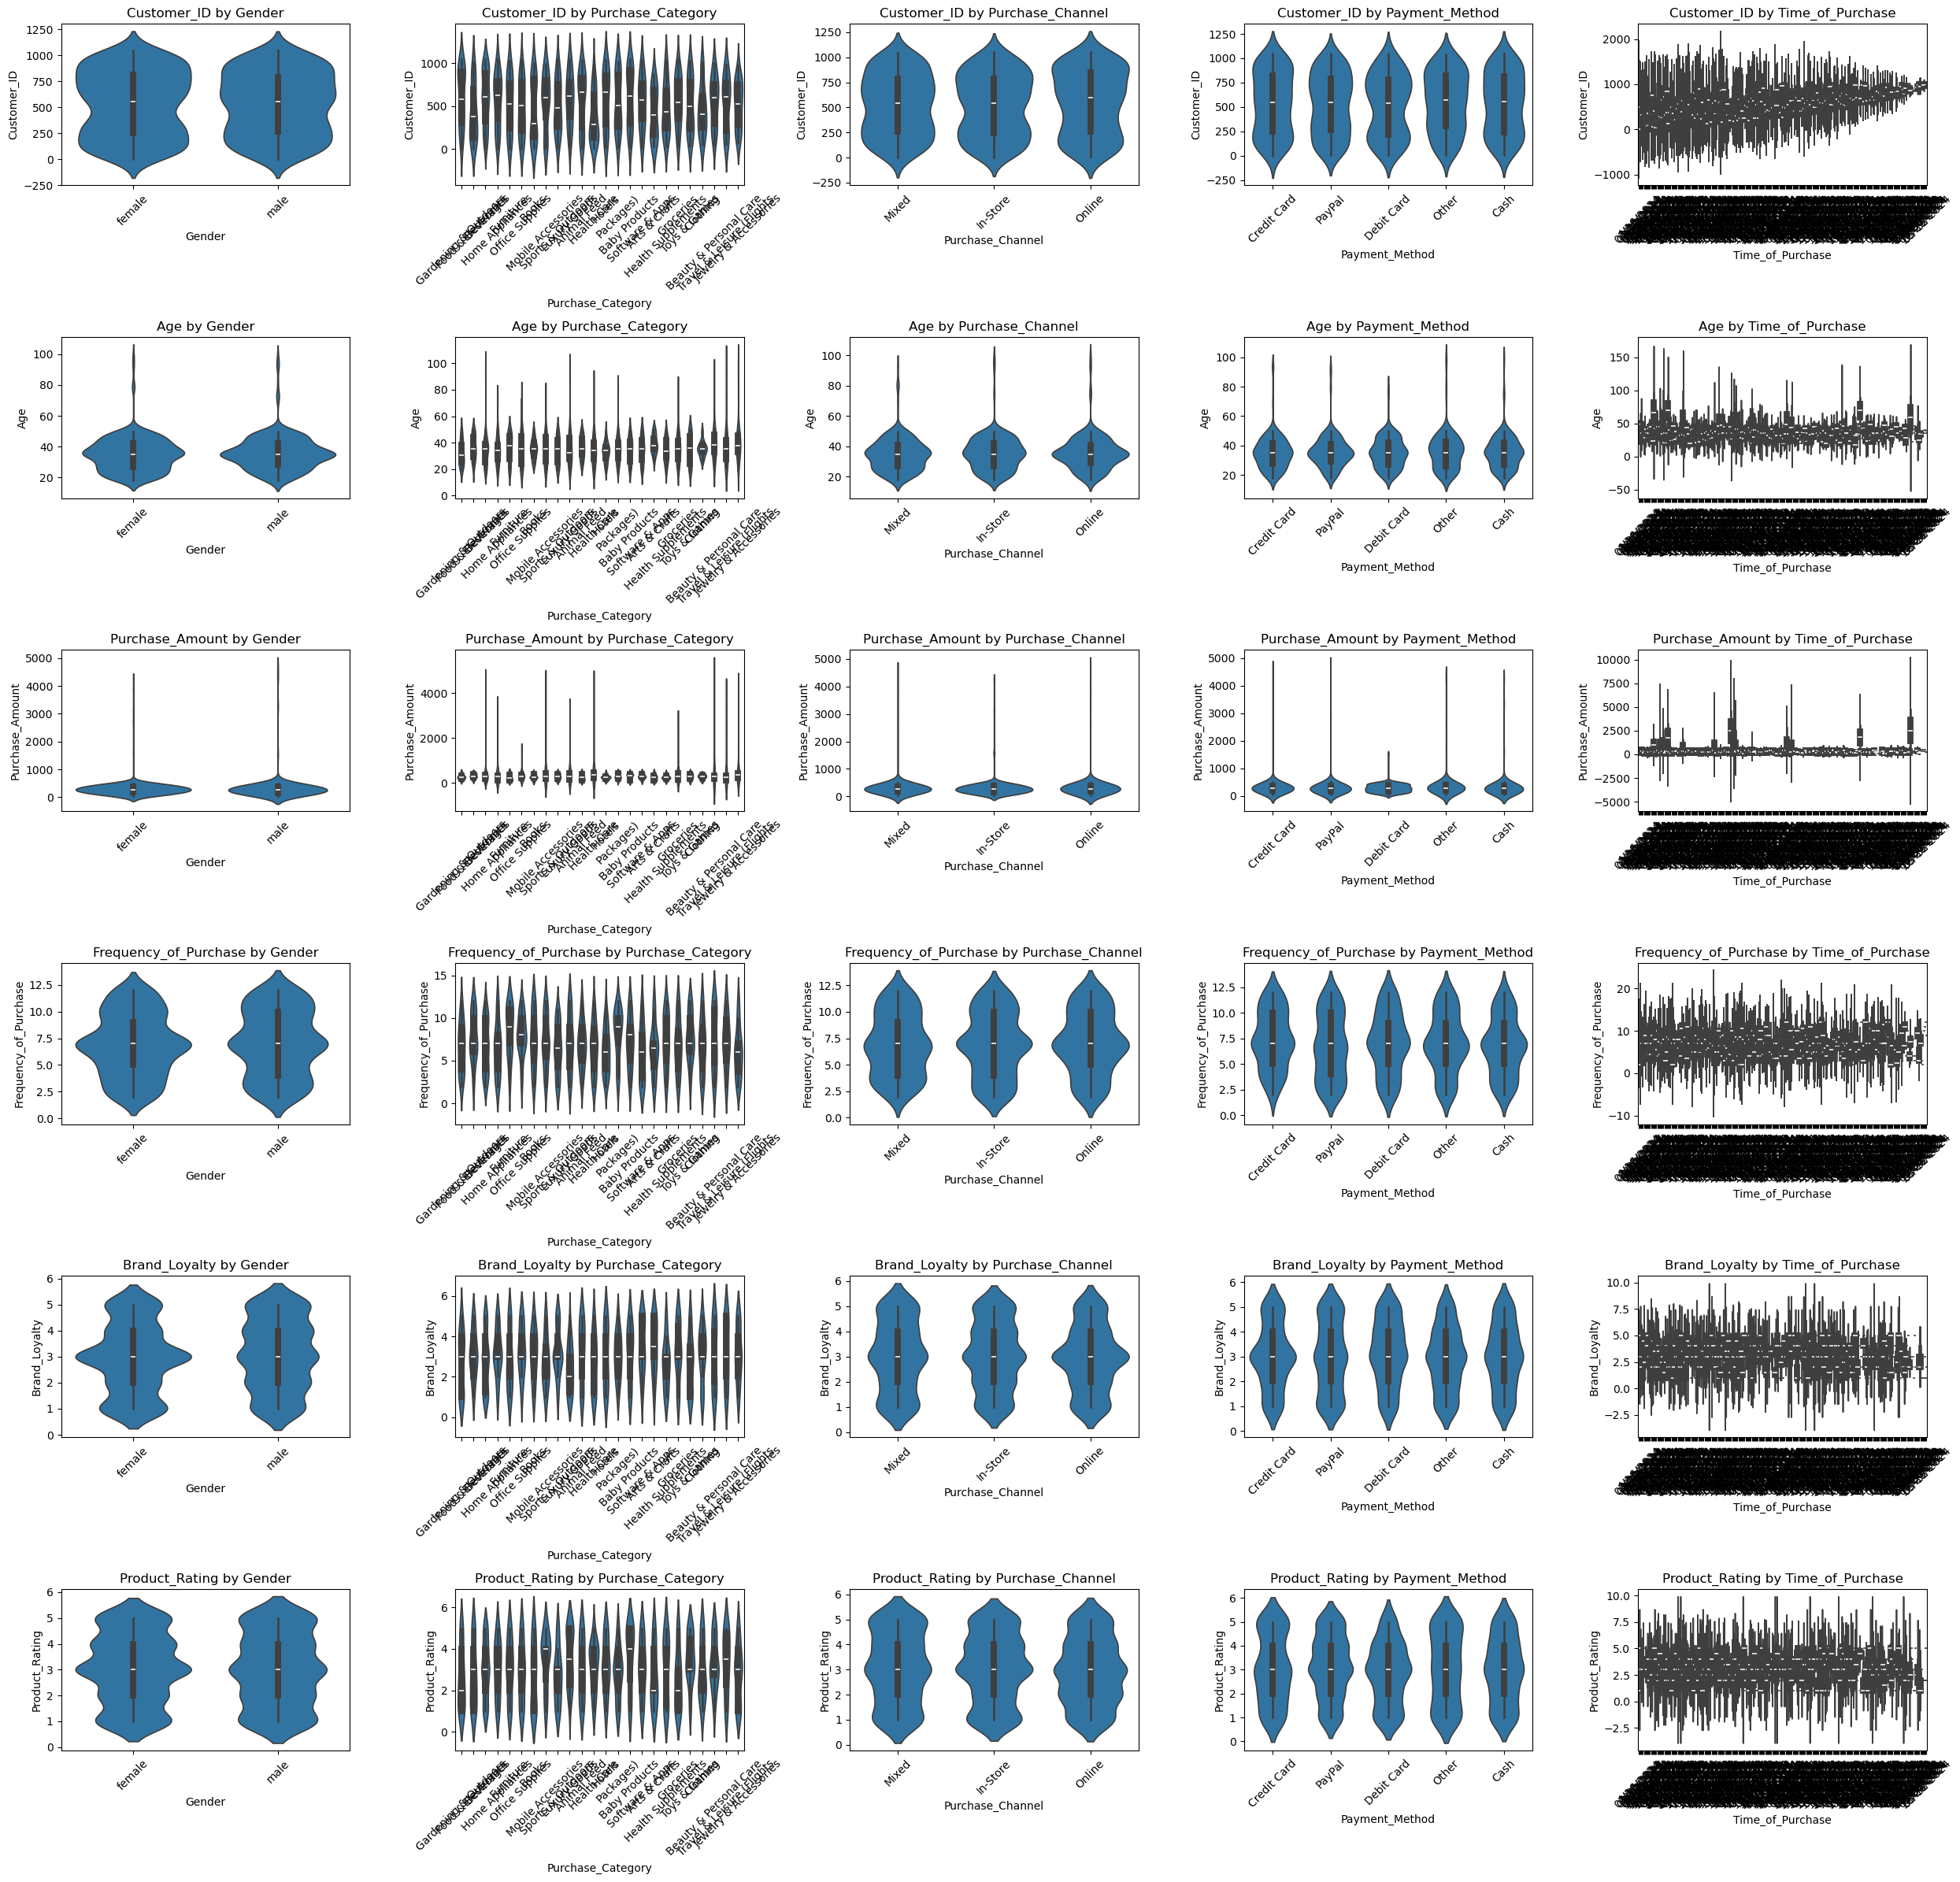

In [47]:
fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(5 * len(cat_cols), 4 * len(num_cols)))
for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        sns.violinplot(x=df[cat], y=df[num], ax=axes[i, j])
        axes[i, j].set_title(f"{num} by {cat}")
        axes[i, j].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

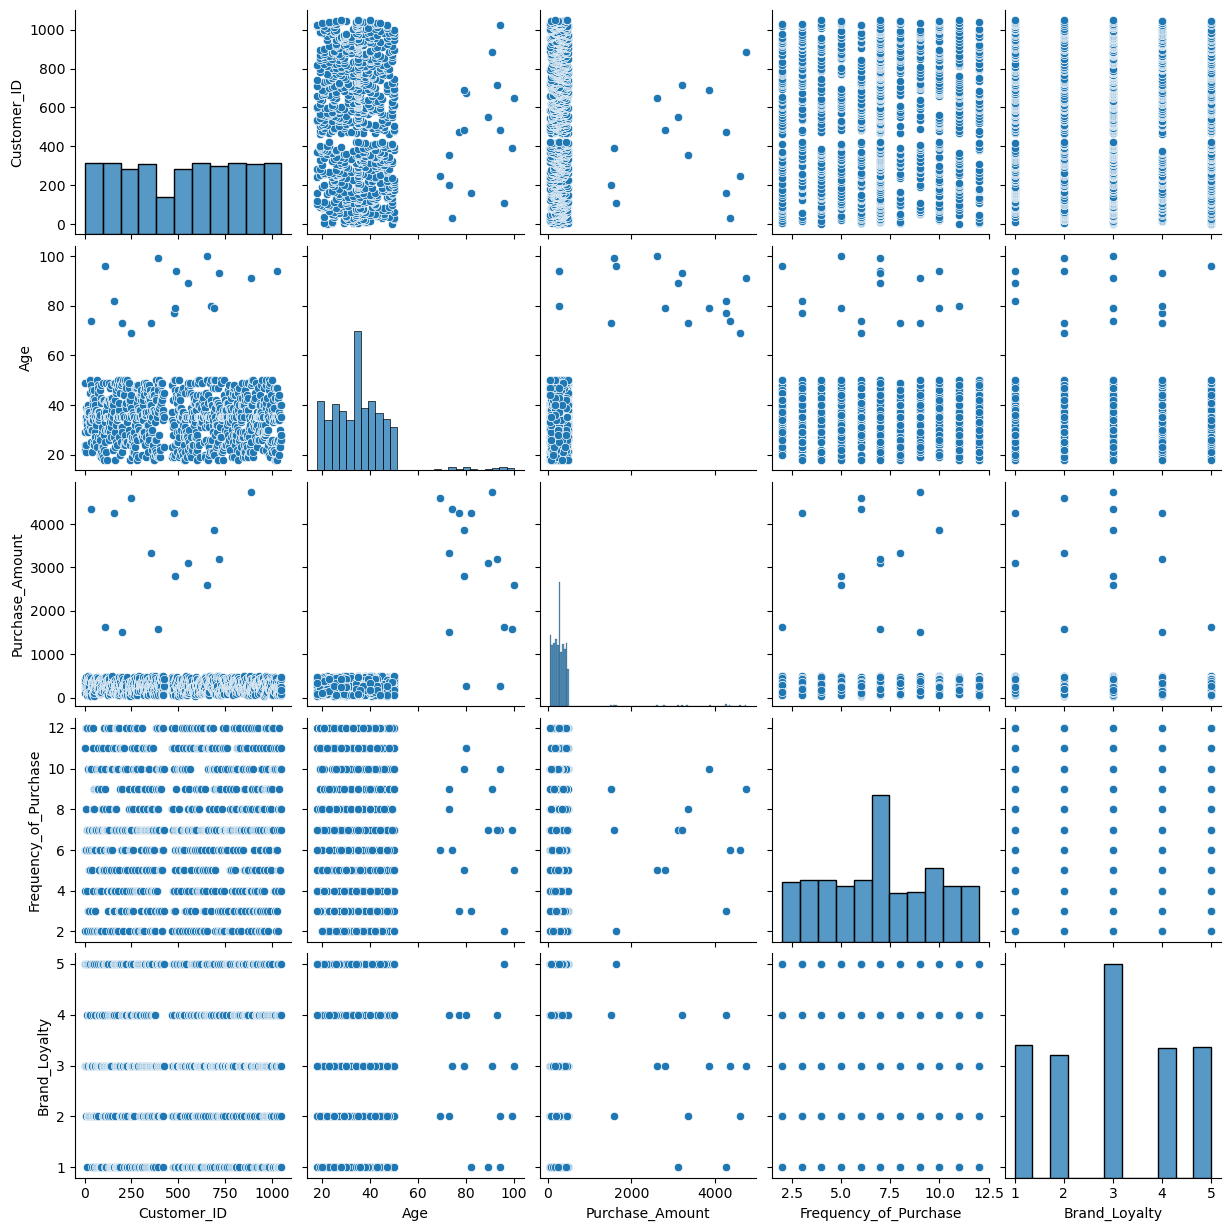

In [49]:


# Selecting a subset of numerical columns for visualization
num_cols = df.select_dtypes(include=['float64', 'int64']).columns[:5]  # Limiting to 5 columns for readability

sns.pairplot(df[num_cols])
plt.show()


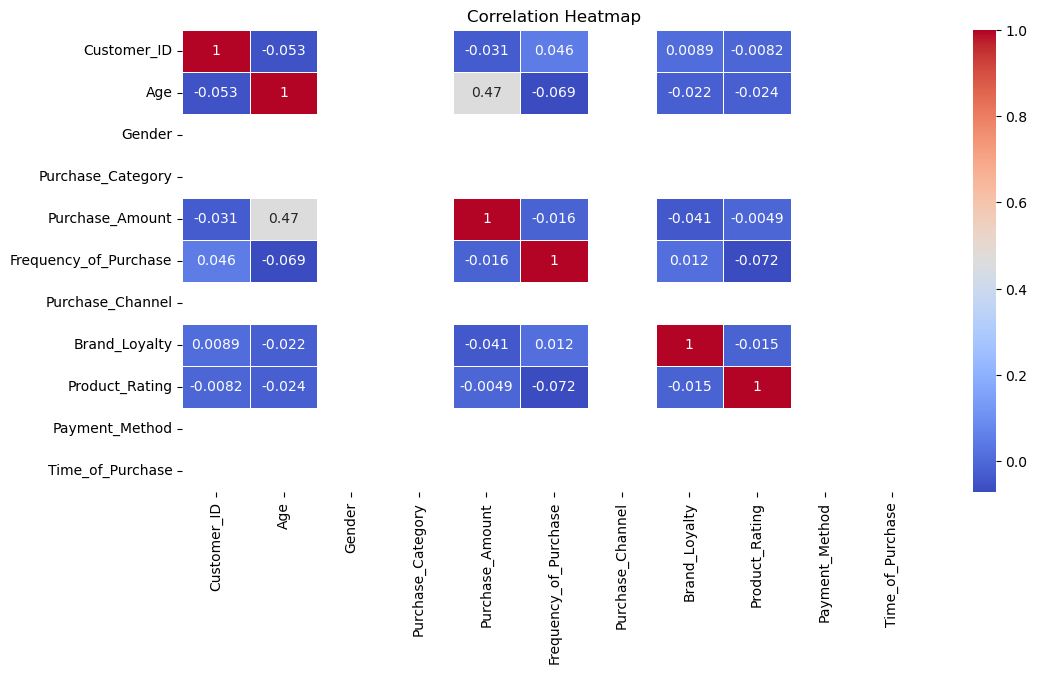

In [50]:
df = df.apply(pd.to_numeric, errors='coerce')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check if there are numeric columns left
if numeric_df.empty:
    print("No numeric columns found. Heatmap cannot be generated.")
else:
    plt.figure(figsize=(12, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()